# HERE BEGINS OUR SOURCE CODE

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
import time
all_files = glob.glob('*.csv')

temp = []
for filename in all_files:
    df = pd.concat((pd.read_csv(f) for f in all_files))
    temp.append(df)
frame = pd.concat(temp, axis=0, ignore_index=True)

In [2]:
frame = frame.drop('No', 1)


In [3]:
#fetch train-data and test_data
train_data=frame.loc[frame['year']!=2017 ]
test_data=frame.loc[frame['year']==2017]
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,2017,1,1,0,417.0,460.0,7.0,112.0,5200.0,6.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Wanshouxigong
33649,2017,1,1,1,406.0,435.0,7.0,115.0,5300.0,5.0,-5.2,1022.3,-6.4,0.0,E,0.7,Wanshouxigong
33650,2017,1,1,2,388.0,388.0,3.0,118.0,5200.0,5.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Wanshouxigong
33651,2017,1,1,3,380.0,389.0,3.0,118.0,5100.0,5.0,-5.2,1022.5,-6.2,0.0,E,1.1,Wanshouxigong
33652,2017,1,1,4,372.0,396.0,4.0,115.0,5300.0,9.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049211,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
5049212,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
5049213,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
5049214,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [ ]:
#initialize x and y
x_train_TEMP=np.array(train_data['TEMP'].values)
x_train_PRES=np.array(train_data['PRES'].values)
x_train_DEWP=np.array(train_data['DEWP'].values)
x_train_RAIN=np.array(train_data['RAIN'].values)
x_train_wd=np.array(train_data['wd'].values)
x_train_WSPM=np.array(train_data['WSPM'].values)

x_test_TEMP=np.array(test_data['TEMP'].values)
x_test_PRES=np.array(test_data['PRES'].values)
x_test_DEWP=np.array(test_data['DEWP'].values)
x_test_RAIN=np.array(test_data['RAIN'].values)
x_test_wd=np.array(test_data['wd'].values)
x_test_WSPM=np.array(test_data['WSPM'].values)

y_train=np.array(train_data['PM2.5'].values)
y_test=np.array(test_data['PM2.5'].values)

#multidimentional data
x_train=np.array(train_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)
x_test=np.array(test_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)


In [ ]:
#this method receives 2 sets, one is the training set one is the label
#this method will train a linear model for 1-d and return it
#eta--the learing rate
def train_simple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder('float')
    y=tf.placeholder('float')
    weight=tf.Variable(np.random.normal())
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    result=tf.add(tf.multiply(weight,x),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.GradientDescentOptimizer(eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%50==0):
                print('epoch=={} the result is:'.format(epoch))
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        trainingLoss=sess.run(loss,feed_dict={x:X,y:Y})/Y.shape[0]
        testLoss=sess.run(loss,feed_dict={x:X_test,y:Y_test})/Y_test.shape[0]
        print('the average error for trainging:')
        print(trainingLoss)
        print('the average error for testing:')
        print(testLoss)
        return X_test,Y_test,prediction,trainingLoss,testLoss
        
        
        
    
            
        
            

In [ ]:
def plot_simple(X,Y,X_test,Y_test,eta,epochs):
    x1,y1=removeNan(X,Y)
    x2,y2=removeNan(X_test[:min(X_test.shape[0],Y_test.shape[0])],Y_test[:min(X_test.shape[0],Y_test.shape[0])])
    x,y,pred,train_loss,test_loss=train_simple(x1,y1,x2,y2,eta,epochs)
    plt.scatter(x2,y2,c='r',s=0.005)
    plt.plot(x2,pred,c='g')
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.ylim(np.min(y2),np.max(y2))
    plt.show()
    

In [ ]:
# remove all nan's from x and y
#if x(or y) contains nan on index i then remove the the i th element from both lists
def removeNan(X,Y):
    temp1 = np.argwhere(np.isnan(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2

def removeNan_str(X,Y):
    temp1 = np.argwhere(pd.isnull(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2
    

In [ ]:
# represent the wind's direction as a number (radius)
#this method receives a set and change everything to a number
def getWindAngle(Z):
    Y=[]
    for direct in Z:
        if pd.isnull(direct):
            Y.append(math.nan)
        elif direct =='SW':
            Y.append(np.radians(225))
        elif direct =='N':
            Y.append(np.radians(0))
        elif direct =='NNW':
            Y.append(np.radians(337.5))
        elif direct =='WNW':
            Y.append(np.radians(292.5))
        elif direct =='WSW':
            Y.append(np.radians(247.5))
        elif direct =='E':
            Y.append(np.radians(90))
        elif direct =='NE':
            Y.append(np.radians(45))
        elif direct =='ENE':
            Y.append(np.radians(67.5))
        elif direct =='ESE':
            Y.append(np.radians(112.5))
        elif direct =='S':
            Y.append(np.radians(180))
        elif direct =='SE':
            Y.append(np.radians(135))
        elif direct =='SSE':
            Y.append(np.radians(157.5))
        elif direct =='SSW':
            Y.append(np.radians(202.5))
        elif direct =='NNE':
            Y.append(np.radians(22.5))
        elif direct =='NW':
            Y.append(np.radians(315.5))
        elif direct =='W':
            Y.append(np.radians(270))
        
    return np.array(Y)
        
            
            
    

In [ ]:
def plot_simple_wind(eta,epochs):
    # this step removes all nans in wind and y then change the string in wd to numbers
    global x_train_wd,y_train,x_test_wd,y_test
    wd_new,y_new=removeNan_str(x_train_wd,y_train)
   
    wd_test,y_test=removeNan_str(x_test_wd,y_test)
    wd_test,y_test=wd_test[:min(wd_test.shape[0],y_test.shape[0])],y_test[:min(wd_test.shape[0],y_test.shape[0])]
    wd_new=getWindAngle(wd_new)
    wd_test=getWindAngle(wd_test)
    x,y,pred,train_loss,test_loss=train_simple(wd_new,y_new,wd_test,y_test,eta,epochs)
    plt.scatter(wd_test,y_test,c='r',s=0.01)
    plt.plot(wd_test,pred,c='g')
    plt.yscale('linear')
    plt.show()
   
    
    

In [ ]:
#preprocess the training matrix and its label so that it contains no nan's 
#then replace the str angle with numerical one
a=set(np.argwhere(pd.isnull(x_train))[:,0])
b=set(np.argwhere(pd.isnull(y_train))[:,0])
indices=list(a.union(b))
x_newTrain=np.delete(x_train,indices,axis=0)
y_newTrain=np.delete(y_train,indices,axis=0)
angles=getWindAngle(x_newTrain[:,4])
x_newTrain[:,4]=angles
print(x_newTrain)
print(pd.isnull(x_newTrain))

In [ ]:
#do that same thing for test data
x_test1=x_test[:min(x_test.shape[0],y_test.shape[0]),:]
y_test1=y_test[:min(x_test.shape[0],y_test.shape[0])]
c=set(np.argwhere(pd.isnull(x_test1))[:,0])
d=set(np.argwhere(pd.isnull(y_test1))[:,0])
indices=list(c.union(d))
x_newTest=np.delete(x_test1,indices,axis=0)
y_newTest=np.delete(y_test1,indices,axis=0)
angles1=getWindAngle(x_newTest[:,4])
x_newTest[:,4]=angles1
print(x_newTest)

In [202]:

#this method is to give a model(multidimensional)
def train_multiple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        return X_test,Y_test,prediction

In [203]:
#this method is to give a model(multidimensional)
def train_multiple_SGD(X,Y,X_test,Y_test,eta,epochs,size):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder(dtype=tf.float32)
    y=tf.placeholder(dtype=tf.float32)
    weight=tf.Variable(np.random.normal(size=(6,1)))
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    bias=tf.cast(bias,tf.float32)
    weight=tf.cast(weight,tf.float32)
    result=tf.add(tf.matmul(x,weight),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.AdamOptimizer(learning_rate=eta).minimize(loss)  #can choose adam if you want
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            start=time.time()
            indices=np.random.choice(range(X.shape[0]), size, replace=False)
            feed_dict={x:X[indices],y:Y[indices]}
            sess.run(optimizer,feed_dict=feed_dict)
            print('time spent on this epoch:{}'.format(time.time()-start))
            if(epoch%20==0):
                print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
                print('w:{}'.format(weight.eval()))
                print('b:{}'.format(bias.eval()))
                print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test}).T[0]
        return X_test,Y_test,prediction,weight.eval().T[0],bias.eval()

    

# HERE BEGINS THE EXPERIMENT

## the multidimensional model with tensorflow

#### 1.the multidimensional model with regular gradient descent (very inefficient)

In [204]:
#if you set the size to be the original one, your runnin out of memory
#so this way is not efficient, we have to use the stochastic one
#so this one is what we wanna avoid
size=int(x_newTrain.shape[0]/500)
train_multiple(x_newTrain[:size],y_newTrain[:size],x_newTest,y_newTest,0.0039,500)


cost:870478.25
w:[[-0.27743813]
 [ 1.0119339 ]
 [-0.22386079]
 [ 0.32364845]
 [-0.09490213]
 [ 0.69815195]]
b:1.5460456609725952



KeyboardInterrupt: 

#### 2.the multidimensional model with stochastic gradient descent (better)

In [209]:
# from sklearn.preprocessing import normalize
#test of sgd 
#we gotta choose the best size for stochastic gradient descent
#first normalize the data
size=2**12
# x_newTrain1=normalize(np.array(x_newTrain,dtype='float32'), axis=1,norm='max')
# x_newTest1=normalize(np.array(x_newTest,dtype='float32'), axis=1,norm='max')
# y_newTrain1=np.array(y_newTrain,dtype='float32')
# y_newTest1=np.array(y_newTest,dtype='float32')
# # y_newTrain1=y_newTrain1/max(y_newTrain1)
# # y_newTest1=y_newTest1/max(y_newTest1)
# y_newTrain1=y_newTrain1/max(y_newTrain)
# y_newTest1=y_newTest1/max(y_newTrain)
x_t,y_t,pred,w,b=train_multiple_SGD(x_newTrain,y_newTrain,x_newTest,y_newTest,0.03,140,size)


time spent on this epoch:2.1237947940826416
cost:938074.9375
w:[[1.865156 ]
 [0.9997228]
 [1.2765784]
 [1.4225307]
 [0.5541732]
 [1.4572898]]
b:-1.141571283340454

time spent on this epoch:1.3875820636749268
time spent on this epoch:1.4106402397155762
time spent on this epoch:1.3430771827697754
time spent on this epoch:1.3768529891967773
time spent on this epoch:1.407728910446167
time spent on this epoch:1.6974389553070068
time spent on this epoch:1.3835961818695068
time spent on this epoch:1.6688768863677979
time spent on this epoch:1.6126031875610352
time spent on this epoch:1.4712471961975098
time spent on this epoch:1.4641900062561035
time spent on this epoch:1.4114103317260742
time spent on this epoch:1.4109289646148682
time spent on this epoch:1.4820969104766846
time spent on this epoch:1.3818089962005615
time spent on this epoch:1.3970990180969238
time spent on this epoch:1.4106459617614746
time spent on this epoch:1.4532580375671387
time spent on this epoch:1.663604974746704
ti

In [210]:
#the first one is the train error the second one is the test error
trainError=np.mean(np.square((np.dot(x_newTrain,w)+b-y_newTrain)))
testError=np.mean(np.square((np.dot(x_newTest,w)+b-y_newTest)))
print('the train error (avg) is {}'.format(trainError))
print('the test error (avg) is {}'.format(testError))


the train error (avg) is 6553.786281857677
the test error (avg) is 13649.677902204201


## Now we use only one attribute to predict the PM 2.5

##### (the red dot is the test data and the line is the prediction)

#### 1.use temp to predict the data

epoch==0 the result is:
cost:9576.7734375
w:3.4343152046203613
b:-0.7014254331588745

epoch==50 the result is:
cost:8938.01171875
w:2.727217435836792
b:7.957589149475098

epoch==100 the result is:
cost:8442.6552734375
w:2.3870553970336914
b:15.81983470916748

epoch==150 the result is:
cost:8035.61767578125
w:2.078704833984375
b:22.94680404663086

epoch==200 the result is:
cost:7701.14990234375
w:1.7991902828216553
b:29.40727996826172

epoch==250 the result is:
cost:7426.31689453125
w:1.5458160638809204
b:35.263572692871094

epoch==300 the result is:
cost:7200.4833984375
w:1.3161369562149048
b:40.57219314575195

epoch==350 the result is:
cost:7014.91357421875
w:1.107937216758728
b:45.38435745239258

epoch==400 the result is:
cost:6862.4306640625
w:0.9192082285881042
b:49.746490478515625

epoch==450 the result is:
cost:6737.13330078125
w:0.7481291890144348
b:53.700679779052734

epoch==500 the result is:
cost:6634.17626953125
w:0.593048632144928
b:57.28508758544922

the final result:
0.45

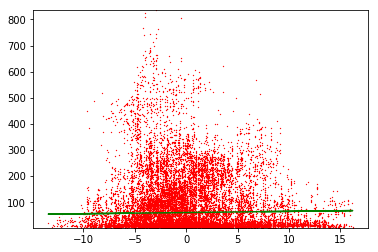

In [211]:
# use temp to predict the data
plot_simple(x_train_TEMP,y_train,x_test_TEMP,y_test,0.0025,550)

#### 2. use pres to predict the data

epoch==0 the result is:
cost:53027.65625
w:-0.1362314671278
b:0.6513820290565491

epoch==50 the result is:
cost:6263.38330078125
w:0.0777977779507637
b:0.6515938639640808

epoch==100 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==150 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==200 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==250 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==300 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==350 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==400 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==450 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

epoch==500 the result is:
cost:6263.3828125
w:0.07780010253190994
b:0.6515938639640808

the final result:
0.0778001
0.651593

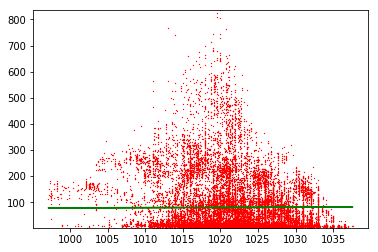

In [213]:
# use pres to predict the data
plot_simple(x_train_PRES,y_train,x_test_PRES,y_test,0.0000001,550)

#### 3.  use dewp to train the data

epoch==0 the result is:
cost:12218.5673828125
w:3.5054914951324463
b:0.8350133895874023

epoch==50 the result is:
cost:8317.705078125
w:1.5995818376541138
b:29.77222442626953

epoch==100 the result is:
cost:7002.001953125
w:1.1632310152053833
b:47.7420654296875

epoch==150 the result is:
cost:6497.25
w:0.9687689542770386
b:58.89501953125

epoch==200 the result is:
cost:6302.88134765625
w:0.8558954000473022
b:65.8164291381836

epoch==250 the result is:
cost:6228.02587890625
w:0.786646842956543
b:70.11172485351562

epoch==300 the result is:
cost:6199.1982421875
w:0.7437542080879211
b:72.77731323242188

epoch==350 the result is:
cost:6188.095703125
w:0.7171438932418823
b:74.43150329589844

epoch==400 the result is:
cost:6183.81982421875
w:0.7006310820579529
b:75.45806884765625

epoch==450 the result is:
cost:6182.17333984375
w:0.690383791923523
b:76.09513092041016

epoch==500 the result is:
cost:6181.5390625
w:0.684024453163147
b:76.4905014038086

epoch==550 the result is:
cost:6181.29492

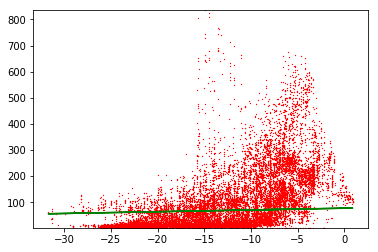

In [214]:
#use dewp to train the data
plot_simple(x_train_DEWP,y_train,x_test_DEWP,y_test,0.005,1550)

#### 4.use rain to train the data

epoch==0 the result is:
cost:12202.84765625
w:0.342092901468277
b:2.1720588207244873

epoch==50 the result is:
cost:8437.3935546875
w:1.5283253192901611
b:32.58686828613281

epoch==100 the result is:
cost:7063.52783203125
w:1.6960134506225586
b:50.972713470458984

epoch==150 the result is:
cost:6560.1787109375
w:1.4108307361602783
b:62.09904861450195

epoch==200 the result is:
cost:6374.73388671875
w:0.9661969542503357
b:68.8407211303711

epoch==250 the result is:
cost:6305.90283203125
w:0.5055215954780579
b:72.93160247802734

epoch==300 the result is:
cost:6280.10302734375
w:0.09168622642755508
b:75.41815948486328

epoch==350 the result is:
cost:6270.3115234375
w:-0.25401246547698975
b:76.9324951171875

epoch==400 the result is:
cost:6266.53662109375
w:-0.5304515957832336
b:77.85678100585938

epoch==450 the result is:
cost:6265.05224609375
w:-0.7452205419540405
b:78.42236328125

epoch==500 the result is:
cost:6264.45703125
w:-0.908733606338501
b:78.76944732666016

the final result:
-1

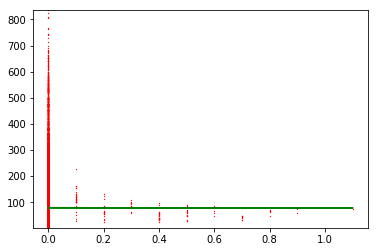

In [121]:
#use rain to train the data
plot_simple(x_train_RAIN,y_train,x_test_RAIN,y_test,0.005,550)

#### 5. use wspm to train the data

epoch==0 the result is:
cost:12284.32421875
w:1.119882345199585
b:0.13221830129623413

epoch==50 the result is:
cost:8357.87109375
w:16.48349952697754
b:22.36812400817871

epoch==100 the result is:
cost:7697.015625
w:13.126969337463379
b:34.72350311279297

epoch==150 the result is:
cost:7216.52734375
w:9.066191673278809
b:44.90116882324219

epoch==200 the result is:
cost:6859.13623046875
w:5.481907367706299
b:53.6458854675293

epoch==250 the result is:
cost:6593.26708984375
w:2.3846895694732666
b:61.1859130859375

epoch==300 the result is:
cost:6395.47998046875
w:-0.2870919704437256
b:67.68907928466797

epoch==350 the result is:
cost:6248.341796875
w:-2.591554641723633
b:73.2981185913086

epoch==400 the result is:
cost:6138.88330078125
w:-4.579178333282471
b:78.13597869873047

epoch==450 the result is:
cost:6057.45361328125
w:-6.293525695800781
b:82.30867004394531

epoch==500 the result is:
cost:5996.87744140625
w:-7.772162914276123
b:85.90764617919922

epoch==550 the result is:
cost:5

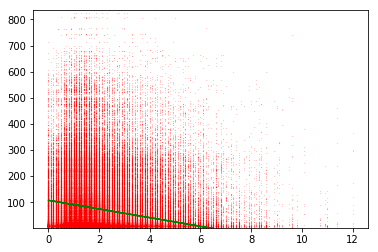

In [126]:
# use wspm to train the data
plot_simple(x_train_WSPM,y_train,x_test_WSPM,y_test,0.005,1550)

#### 6.use wind to train the data

/Users/lingjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  app.launch_new_instance()


epoch==0 the result is:
cost:11242.291015625
w:2.851797580718994
b:1.6591393947601318

epoch==50 the result is:
cost:7963.43701171875
w:14.259713172912598
b:17.530210494995117

epoch==100 the result is:
cost:7496.93603515625
w:11.626448631286621
b:28.00125503540039

epoch==150 the result is:
cost:7152.7568359375
w:9.340843200683594
b:36.989356994628906

epoch==200 the result is:
cost:6898.8203125
w:7.377569198608398
b:44.709716796875

epoch==250 the result is:
cost:6711.4658203125
w:5.691206932067871
b:51.34114074707031

epoch==300 the result is:
cost:6573.23583984375
w:4.242702007293701
b:57.03722381591797

epoch==350 the result is:
cost:6471.24951171875
w:2.998502731323242
b:61.929893493652344

epoch==400 the result is:
cost:6396.0029296875
w:1.9297876358032227
b:66.13249969482422

epoch==450 the result is:
cost:6340.486328125
w:1.01181161403656
b:69.74234771728516

epoch==500 the result is:
cost:6299.5263671875
w:0.22331951558589935
b:72.84298706054688

epoch==550 the result is:
cos

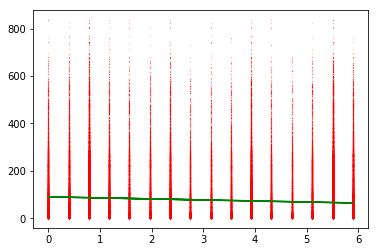

In [128]:
# use wind to train the data
plot_simple_wind(0.005,1500)

# This is the second  multidimensional model but uses keras

In [4]:
# multidimensional linear regression
frame1=frame.copy()
frame1 = frame1.dropna()
#Normalize data

#These are all the columns that are numeric
numeric_col = ['SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

for col in numeric_col:
    frame1[col] = (frame1[col] - frame1[col].min())/(frame1[col].max() - frame1[col].min())
#fetch train-data and test_data
train_data3=frame1.loc[frame['year']!=2017 ]
test_data3=frame1.loc[frame['year']==2017]


In [2]:
class Linear(tf.keras.Model):

    def __init__(self, dim=1):
        super(Linear, self).__init__()
        self.w = tf.Variable(initial_value=tf.zeros((dim)),
                             trainable=True,dtype='float32')

        self.b = tf.Variable(initial_value=tf.zeros((1)),
                             trainable=True,dtype='float32')
        self.dim = dim


    def call(self, inputs):
        x = inputs
        
        #x must be the right size
        assert(x.shape[1] == self.dim)
        
        out = (self.w*x) + self.b
        return out

In [3]:
all_files = glob.glob('*.csv')

temp = []
for filename in all_files:
    df = pd.concat((pd.read_csv(f) for f in all_files))
    temp.append(df)
frame = pd.concat(temp, axis=0, ignore_index=True)
frame = frame.drop('No', 1)
frame = frame.dropna()
train_data=frame.loc[frame['year']!=2017 ]
test_data=frame.loc[frame['year']==2017]

In [ ]:
train_col = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

x_train = train_data[train_col].to_numpy(dtype='float32')
y_train = train_data['PM2.5'].to_numpy(dtype='float32')
x_test = test_data[train_col].to_numpy(dtype='float32')
y_test = test_data['PM2.5'].to_numpy(dtype='float32')

model = Linear(dim = len(train_col))
model.compile('adam','mse')
model.fit(x = x_train ,y = y_train,epochs = 200,batch_size = 1024,validation_data = (x_test,y_test))

Train on 4394460 samples, validate on 191556 samples
Epoch 1/200
2617344/4394460 [================>.............] - ETA: 4s - loss: 10515.6039